In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
p=pd.read_csv('/content/monkeypoxaiml.csv')


# New Section

# New Section

In [5]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  int64 
 2   Rectal Pain                     25000 non-null  int64 
 3   Sore Throat                     25000 non-null  int64 
 4   Penile Oedema                   25000 non-null  int64 
 5   Oral Lesions                    25000 non-null  int64 
 6   Solitary Lesion                 25000 non-null  int64 
 7   Swollen Tonsils                 25000 non-null  int64 
 8   HIV Infection                   25000 non-null  int64 
 9   Sexually Transmitted Infection  25000 non-null  int64 
 10  MonkeyPox                       25000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 2.1+ MB


In [6]:
import matplotlib.pyplot as plt

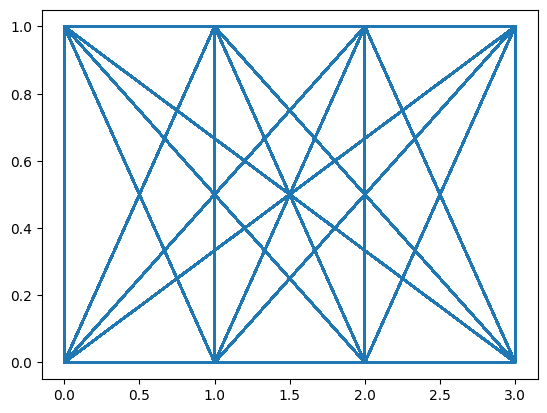

In [7]:
x=p['Systemic Illness']
y=p['MonkeyPox']
plt.plot(x,y)

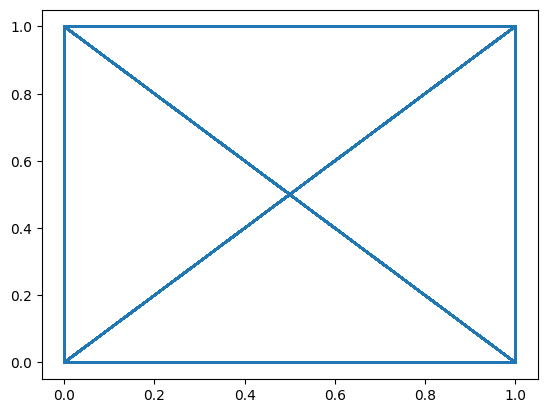

In [8]:
x=p['Rectal Pain']
y=p['MonkeyPox']
plt.plot(x,y)

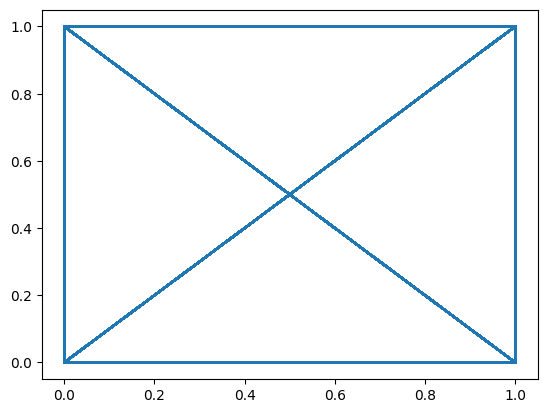

In [9]:
x=p['Sore Throat']
y=p['MonkeyPox']
plt.plot(x,y)

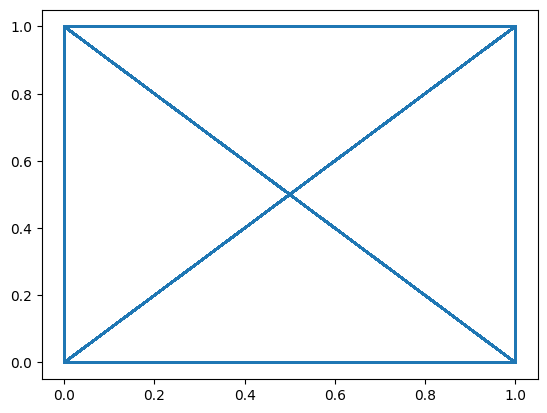

In [10]:
x=p['Penile Oedema']
y=p['MonkeyPox']
plt.plot(x,y)

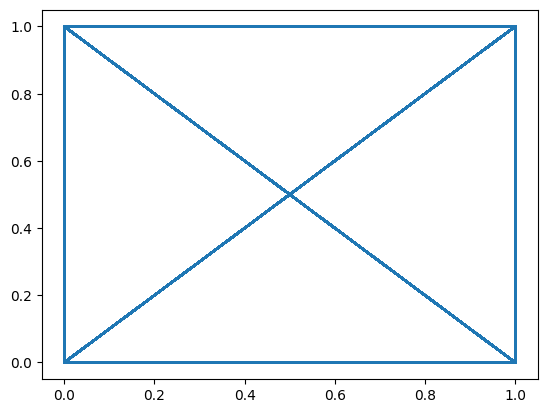

In [11]:
x=p['Oral Lesions']
y=p['MonkeyPox']
plt.plot(x,y)

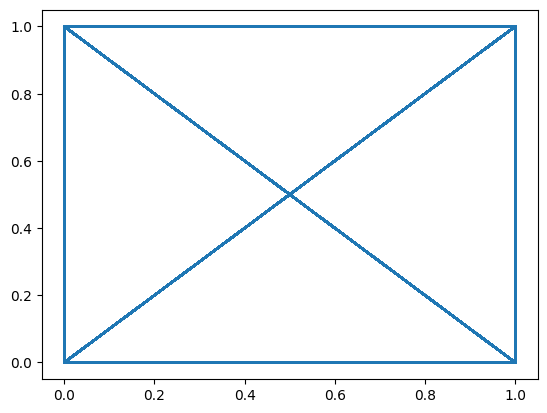

In [12]:
x=p['Solitary Lesion']
y=p['MonkeyPox']
plt.plot(x,y)

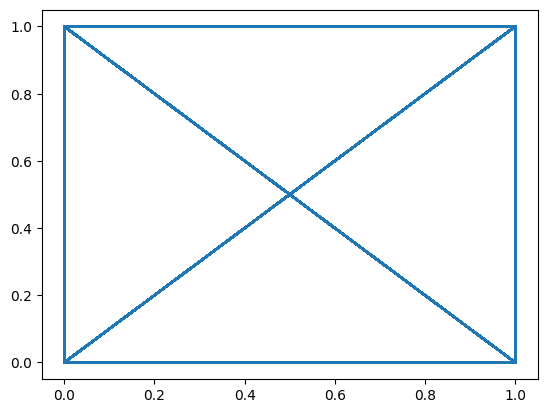

In [13]:
x=p['Swollen Tonsils']
y=p['MonkeyPox']
plt.plot(x,y)

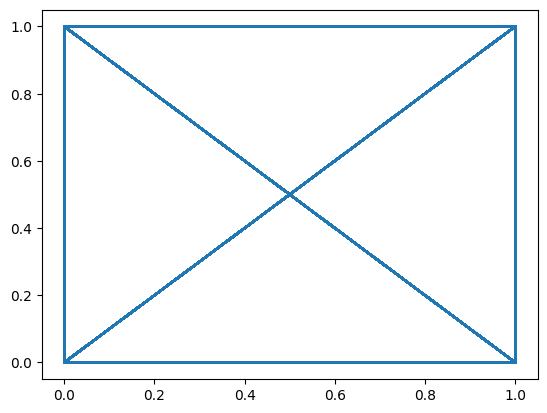

In [14]:
x=p['HIV Infection']
y=p['MonkeyPox']
plt.plot(x,y)

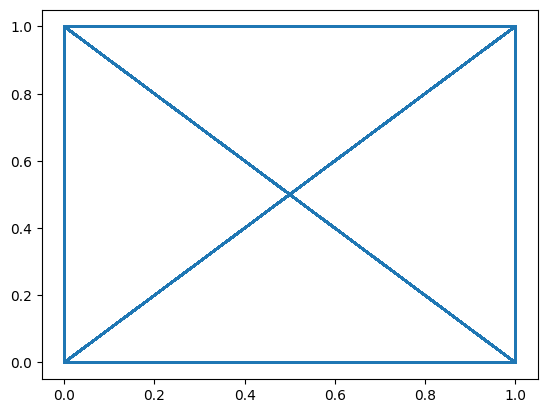

In [15]:
x=p['Sexually Transmitted Infection']
y=p['MonkeyPox']
plt.plot(x,y)

# New Section

<Axes: >

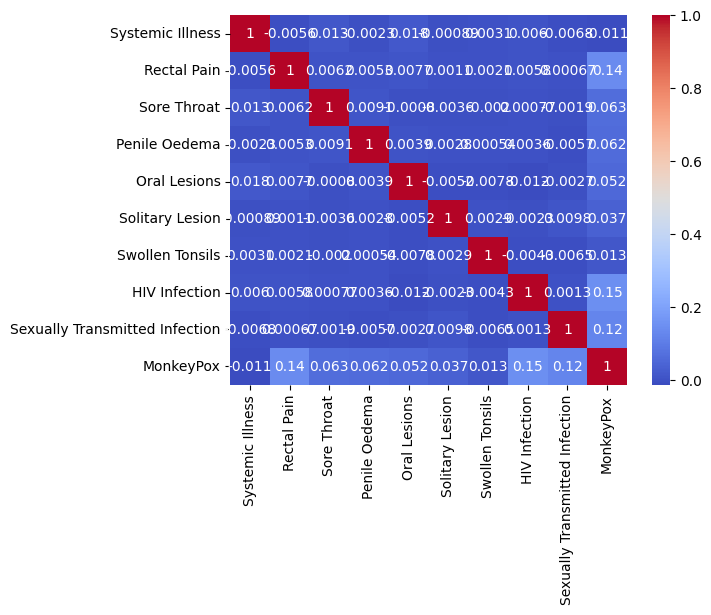

In [16]:
import seaborn as sns
sns.heatmap(p.corr(),annot=True,cmap='coolwarm')

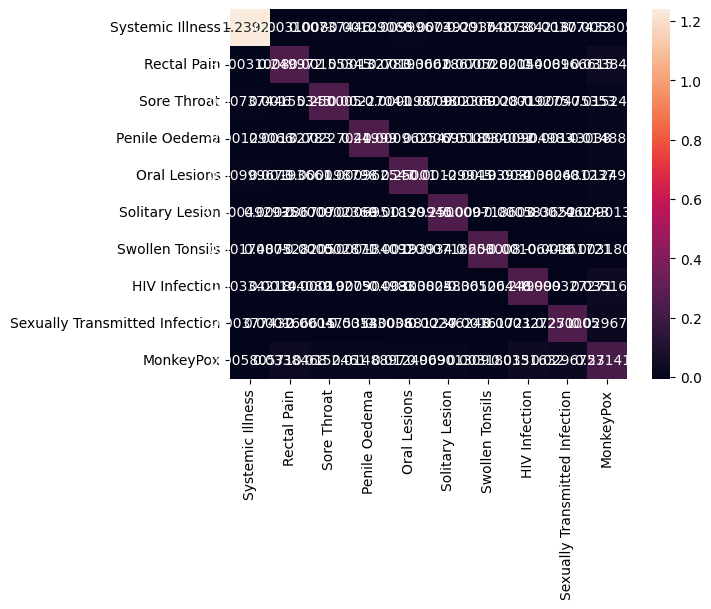

In [17]:
import seaborn as sn
cov_matrix = pd.DataFrame.cov(p)
sn.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [18]:
p.drop(columns=["Patient_ID"],axis=1,inplace=True)
p.dtypes

Systemic Illness                  int64
Rectal Pain                       int64
Sore Throat                       int64
Penile Oedema                     int64
Oral Lesions                      int64
Solitary Lesion                   int64
Swollen Tonsils                   int64
HIV Infection                     int64
Sexually Transmitted Infection    int64
MonkeyPox                         int64
dtype: object

In [19]:
print(p.columns)
print(p.shape)

Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')
(25000, 10)


In [20]:
X=p.drop(columns=['MonkeyPox'])
Y=p[["MonkeyPox"]]

In [21]:
print(X)

       Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0                     0            0            1              1   
1                     1            1            0              1   
2                     1            0            1              1   
3                     0            1            0              0   
4                     2            1            1              1   
...                 ...          ...          ...            ...   
24995                 0            1            1              0   
24996                 1            0            1              1   
24997                 0            1            1              0   
24998                 2            0            1              0   
24999                 2            0            0              1   

       Oral Lesions  Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                 1                0                1              0   
1                 1                0   

In [22]:
print(Y)

       MonkeyPox
0              0
1              1
2              1
3              1
4              1
...          ...
24995          1
24996          1
24997          1
24998          0
24999          1

[25000 rows x 1 columns]


In [23]:
p.groupby('MonkeyPox').MonkeyPox.count()

MonkeyPox
0     9091
1    15909
Name: MonkeyPox, dtype: int64

<Figure size 1200x500 with 0 Axes>

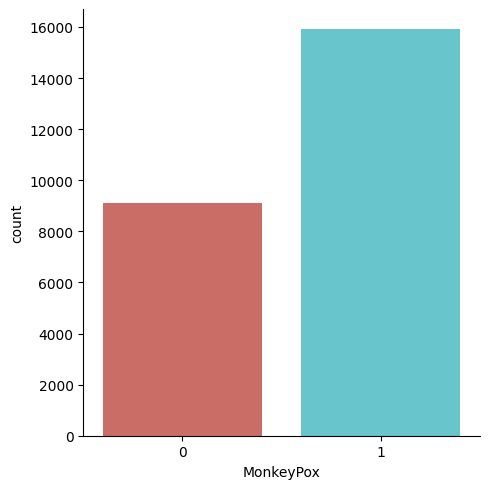

In [24]:
import seaborn as s
plt.figure(figsize=(12,5))
s.catplot(x='MonkeyPox', data=p, palette="hls",kind='count')

In [25]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x = sc.fit_transform(X)
X=pd.DataFrame(x,columns=X.columns)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train.values.reshape(-1,))

LogisticRegression()

In [27]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.66592
Accuracy score of the test data :  0.66048


In [28]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[ 558, 1715],
       [ 407, 3570]])

Text(95.72222222222221, 0.5, 'Truth')

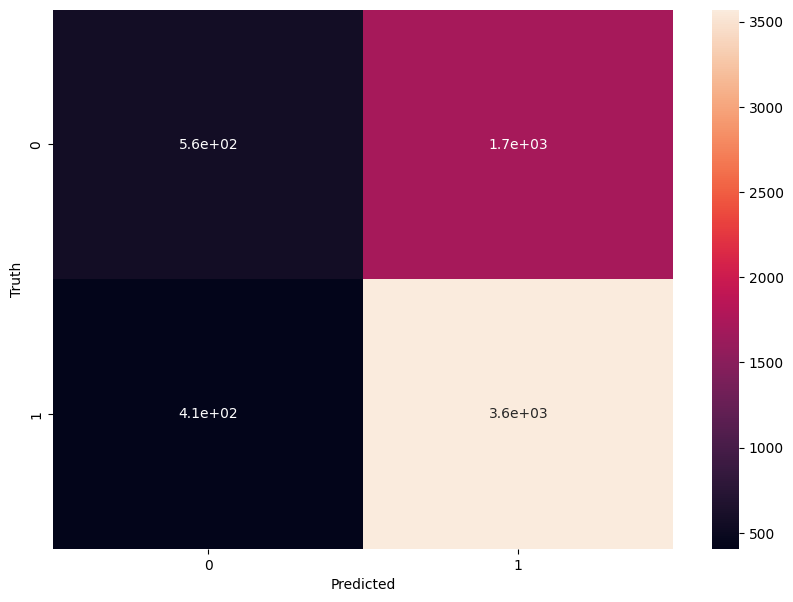

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [34]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Systemic Illness                25000 non-null  int64
 1   Rectal Pain                     25000 non-null  int64
 2   Sore Throat                     25000 non-null  int64
 3   Penile Oedema                   25000 non-null  int64
 4   Oral Lesions                    25000 non-null  int64
 5   Solitary Lesion                 25000 non-null  int64
 6   Swollen Tonsils                 25000 non-null  int64
 7   HIV Infection                   25000 non-null  int64
 8   Sexually Transmitted Infection  25000 non-null  int64
 9   MonkeyPox                       25000 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


In [35]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44      2273
           1       0.69      0.79      0.74      3977

    accuracy                           0.64      6250
   macro avg       0.60      0.59      0.59      6250
weighted avg       0.63      0.64      0.63      6250

accuracy score in knn is: 0.64384


In [36]:
print("accuracy score in train is:",accuracy_score(Y_test,y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

accuracy score in train is: 0.64384
Accuracy score of the test data :  0.66048


In [37]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[ 552, 1721],
       [ 403, 3574]])

Text(95.72222222222221, 0.5, 'Truth')

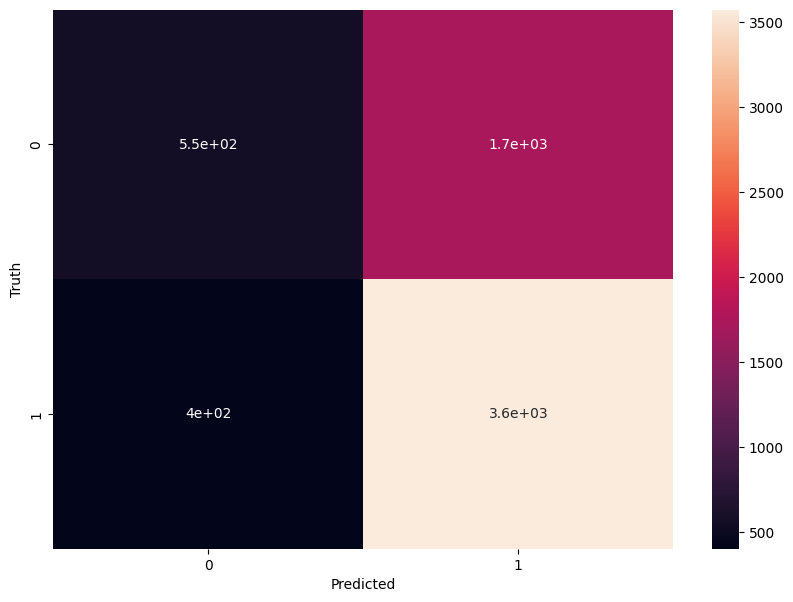

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=109)

In [40]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train.values.reshape(-1,))

SVC(kernel='linear')

In [41]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy on training data:",metrics.accuracy_score(y_test, y_pred))
#print('accuracy of training data:',metrics.accuracy_score(Y_test,Y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy on training data: 0.6414666666666666
Accuracy score of the test data :  0.66048


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[   0, 2689],
       [   0, 4811]])

Text(95.72222222222221, 0.5, 'Truth')

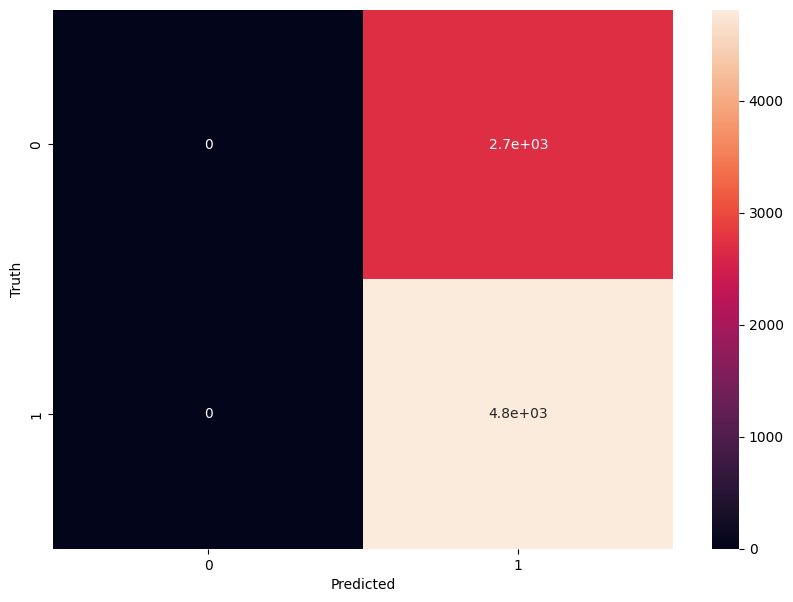

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)
d=DecisionTreeClassifier()
d=d.fit(X_train,Y_train)
Y_pred=d.predict(X_test)
print('accuracy on training data:',metrics.accuracy_score(Y_test,Y_pred))
#print('accuracy of training data:',metrics.accuracy_score(Y_test,Y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

accuracy on training data: 0.67552
Accuracy score of the test data :  0.66048


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[ 860, 1413],
       [ 615, 3362]])

Text(95.72222222222221, 0.5, 'Truth')

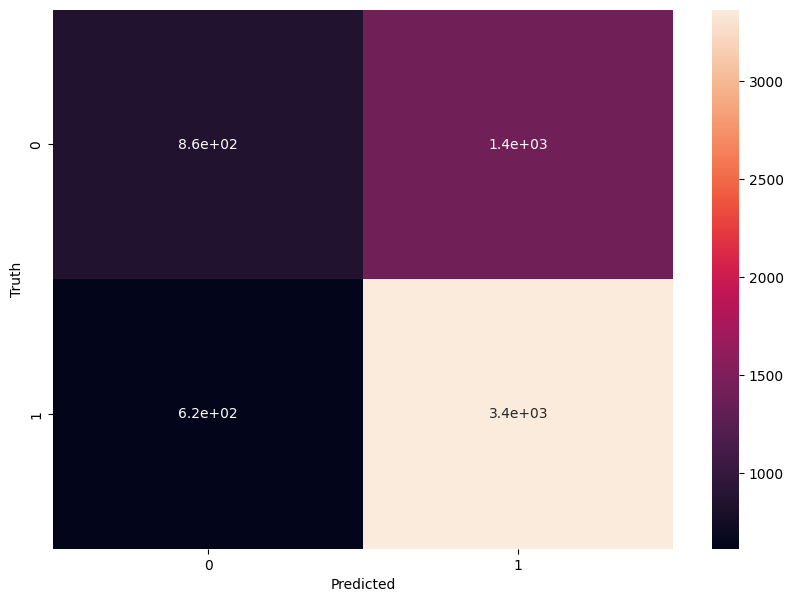

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy="not majority")
x_res,y_res=ros.fit_resample(X,Y)

In [48]:
y_res.value_counts()

MonkeyPox
0            15909
1            15909
dtype: int64

<Axes: >

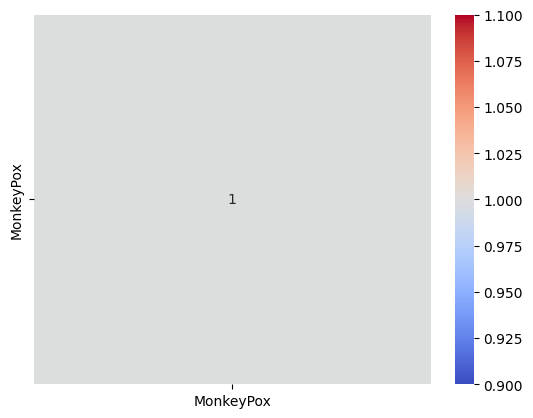

In [49]:
import seaborn as sns
sns.heatmap(y_res.corr(),annot=True,cmap='coolwarm')

<Figure size 1200x500 with 0 Axes>

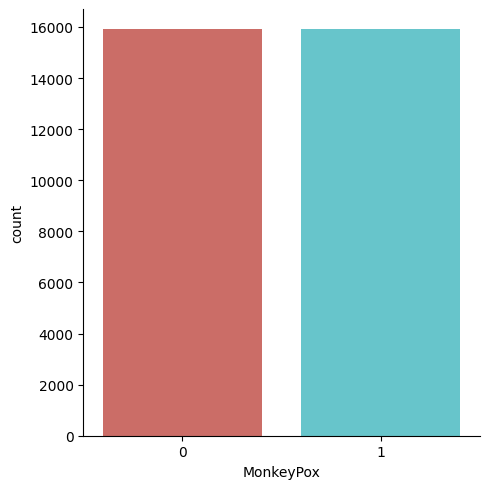

In [52]:
import seaborn as s
plt.figure(figsize=(12,5))
s.catplot(x='MonkeyPox', data=y_res, palette="hls",kind='count')

In [54]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x = sc.fit_transform(x_res)
x_res=pd.DataFrame(x,columns=x_res.columns)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = 0.25,stratify=y_res, random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train.values.reshape(-1,))

LogisticRegression()

In [56]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.6101915098688346
Accuracy score of the test data :  0.6162162162162163


In [57]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[2458, 1520],
       [1533, 2444]])

Text(95.72222222222221, 0.5, 'Truth')

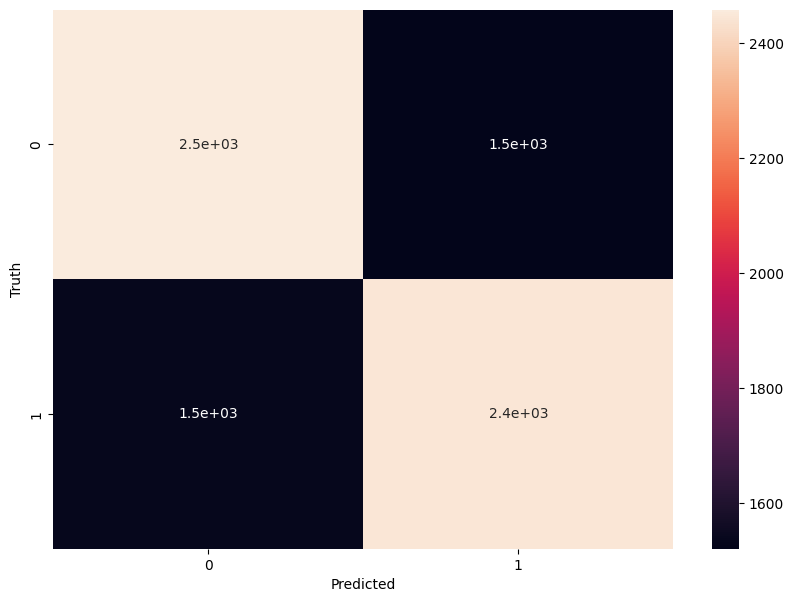

In [58]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size = 0.25,stratify=y_res, random_state=2)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      3978
           1       0.61      0.62      0.61      3977

    accuracy                           0.61      7955
   macro avg       0.61      0.61      0.61      7955
weighted avg       0.61      0.61      0.61      7955

accuracy score in knn is: 0.6093023255813953
Accuracy score of the test data :  0.6162162162162163


In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[2392, 1586],
       [1522, 2455]])

Text(95.72222222222221, 0.5, 'Truth')

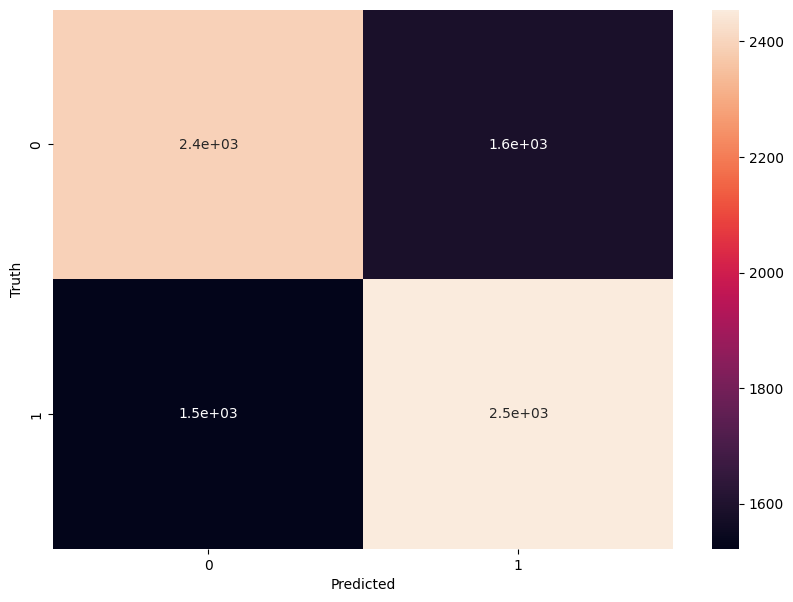

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size = 0.25,stratify=y_res, random_state=2)

In [66]:
from sklearn.svm import SVC
clf = SVC() 
clf.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [67]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6422375864236329


In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[2327, 1651],
       [1195, 2782]])

Text(95.72222222222221, 0.5, 'Truth')

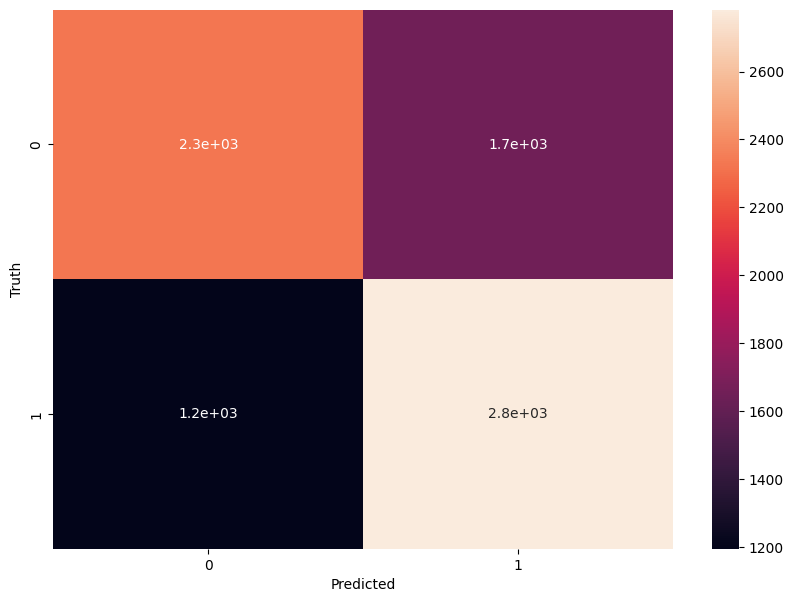

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size = 0.25,stratify=y_res, random_state=2)
d=DecisionTreeClassifier()
d=d.fit(X_train,Y_train.values.reshape(-1,))
Y_pred=d.predict(X_test)
print('accuracy of training data:',metrics.accuracy_score(Y_test,Y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

accuracy of training data: 0.6367064739157763
Accuracy score of the test data :  0.6162162162162163


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[2604, 1374],
       [1516, 2461]])

Text(95.72222222222221, 0.5, 'Truth')

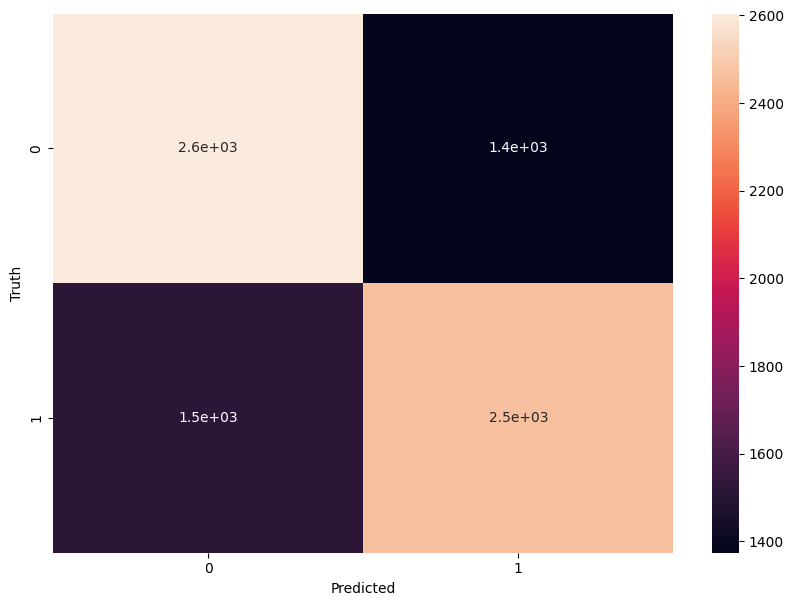

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')